In [12]:
# ============================================
# CO2 CONCENTRATION RPM TACHOMETER
# ============================================
"""
CO2 Concentration displayed as RPM-style tachometer gauge.

COLOR ZONE SOURCES:
- 280 ppm: Pre-industrial baseline (1750-1850)
- 350 ppm: Safe level according to Dr. James Hansen and climate scientists
  Source: Hansen et al. (2008) "Target Atmospheric CO2"
  Source: 350.org based on scientific consensus
- 400 ppm: Dangerous threshold, crossed in 2013
  Source: Yale E360, "How the World Passed a Carbon Threshold"
- 450 ppm: High risk level (50% chance of 2°C warming)
  Source: IPCC reports, OECD Environmental Outlook
- 500 ppm: Critical danger zone
  Source: Climate modeling projections

References:
1. Hansen, J. et al. (2008). "Target Atmospheric CO2: Where Should Humanity Aim?"
2. MIT Climate Portal: "What is the ideal level of carbon dioxide in the atmosphere?"
3. Sustainability Advantage: "CO2 – Why 450 ppm is Dangerous and 350 ppm is Safe"
4. Scientific American: "Climate Numerology: How Much Atmospheric CO2 Is Safe?"
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime
import matplotlib as mpl
mpl.rcParams['font.family'] = ['LCD']

# Load CO2 data
co2_data = pd.read_csv('data/co2_mm_mlo.csv', comment='#')
co2_data['co2_ppm'] = co2_data['average'].replace(-99.99, np.nan)
# Get current CO2 level
current_co2 = co2_data['co2_ppm'].iloc[-1]
current_date = co2_data['date'].iloc[-1] if 'date' in co2_data.columns else datetime.now().strftime('%Y-%m')

print(f"Current CO2 level: {current_co2:.2f} ppm")
print(f"Data as of: {current_date}")

Current CO2 level: 427.49 ppm
Data as of: 2026-01


In [13]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232'
          }

C:\Users\linas\AppData\Local\Temp\ipykernel_39712\2100422685.py:162: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) LCD.
  plt.tight_layout()


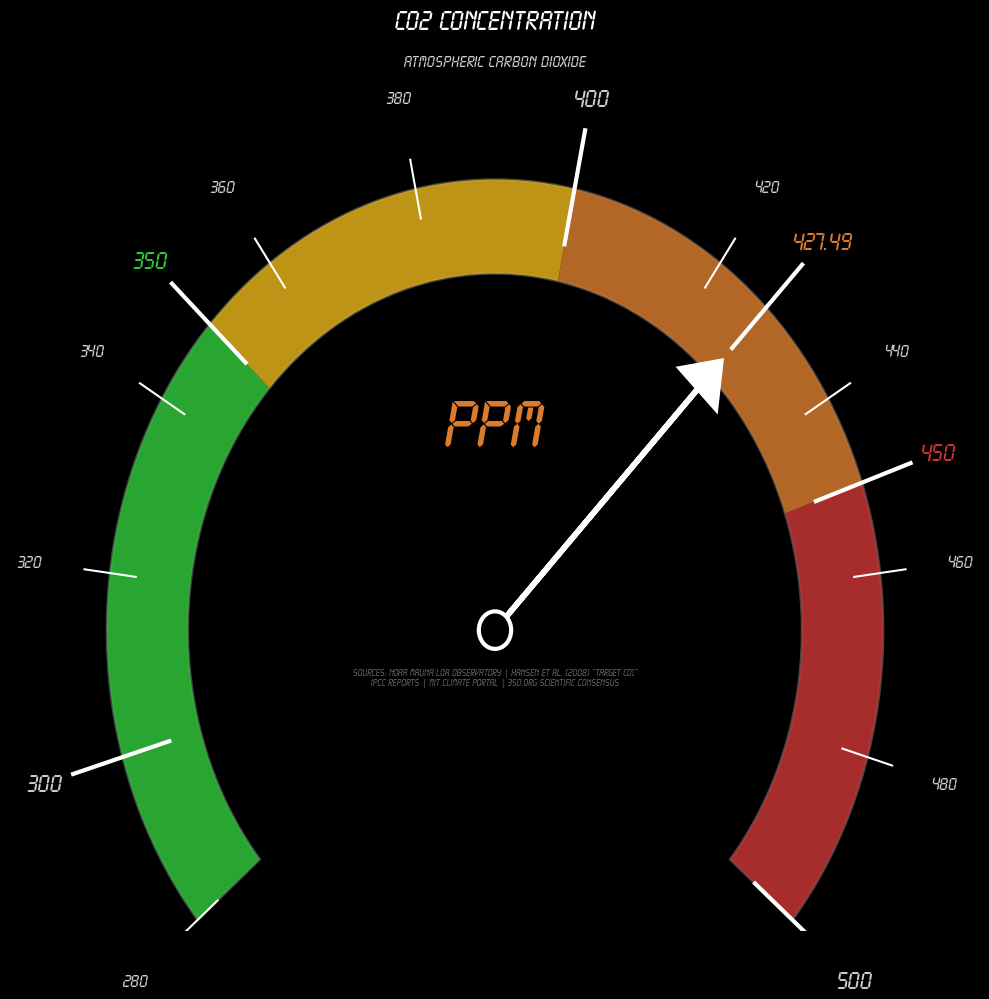

In [30]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='#000000')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.8, 1.5)
ax.axis('off')
ax.set_facecolor('#000000')

# Define color zones based on scientific thresholds
# Green: Safe zone (280-350 ppm)
# Yellow: Caution zone (350-400 ppm)  
# Orange: Warning zone (400-450 ppm)
# Red: Danger zone (450-500 ppm)

# RPM gauge spans 220 degrees (from -110° to +110°)
theta_start = -40  # Bottom left
theta_end = 220     # Bottom right

# Scale: 280 ppm to 500 ppm
co2_min = 280
co2_max = 500
co2_range = co2_max - co2_min

# Calculate angles for each zone
def co2_to_angle(co2_value):
    """Convert CO2 ppm to angle on gauge"""
    pct = (co2_value - co2_min) / co2_range
    return theta_end + pct * (theta_start - theta_end)

angle_350 = co2_to_angle(350)  # Safe limit
angle_400 = co2_to_angle(400)  # Dangerous threshold
angle_450 = co2_to_angle(450)  # High risk

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor='#1a1a1a', edgecolor='#444444', linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 280-350 ppm (SAFE)
safe_arc = Wedge((0, 0), 1.2, angle_350, theta_end, width=0.25,
                 facecolor=colors['green'], edgecolor='none', alpha=0.8)
ax.add_patch(safe_arc)

# Yellow zone: 350-400 ppm (CAUTION)
caution_arc = Wedge((0, 0), 1.2, angle_400, angle_350, width=0.25,
                    facecolor=colors['yellow'], edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 400-450 ppm (WARNING)
warning_arc = Wedge((0, 0), 1.2, angle_450, angle_400, width=0.25,
                    facecolor=colors['orange'], edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 450-500 ppm (DANGER)
danger_arc = Wedge((0, 0), 1.2, theta_start, angle_450, width=0.25,
                   facecolor=colors['red'], edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
major_ticks = [300, 350, 400, 450, 500]

tick_values = [280, 300, 320, 340, 350, 360, 380, 400, 420, 440, 450, 460, 480, 500]

for co2_val in tick_values:
    co2_val = int(co2_val)
    angle = co2_to_angle(co2_val)
    angle_rad = np.radians(angle)

    # Label position
    x_label = 1.45 * np.cos(angle_rad)
    y_label = 1.45 * np.sin(angle_rad)
    label_text = f'{co2_val}'

    # Decide if major or minor tick
    if co2_val in major_ticks:
        tick_outer = 1.36
        tick_inner = 1.05
        tick_lw = 3
        label_size = 18
    else:
        tick_outer = 1.28
        tick_inner = 1.12
        tick_lw = 1.5
        label_size = 13

    # Label styling
    label_color = '#cccccc'
    label_weight = 'normal'

    if co2_val == 350:
        label_color = colors['green']
        label_weight = 'bold'
    elif co2_val == 450:
        label_color = colors['red']
        label_weight = 'bold'

    ax.text(
        x_label, y_label, label_text,
        ha='center', va='center',
        fontsize=label_size,
        color=label_color,
        fontweight=label_weight
    )

    # Draw tick mark
    x_outer = tick_outer * np.cos(angle_rad)
    y_outer = tick_outer * np.sin(angle_rad)
    x_inner = tick_inner * np.cos(angle_rad)
    y_inner = tick_inner * np.sin(angle_rad)

    ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=tick_lw
    )

# Needle pointing to current CO2
needle_angle = co2_to_angle(current_co2)
needle_rad = np.radians(needle_angle)
needle_x = 0.9 * np.cos(needle_rad)
needle_y = 0.9 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='#ffffff', ec='#ffffff', linewidth=4, zorder=2)

x_outer = 1.36 * np.cos(needle_rad)
y_outer = 1.36 * np.sin(needle_rad)
x_inner = 1.05 * np.cos(needle_rad)
y_inner = 1.05 * np.sin(needle_rad)
x_label = 1.45 * np.cos(needle_rad)
y_label = 1.45 * np.sin(needle_rad)
ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=tick_lw
    )
ax.text(
        x_label, y_label, current_co2,
        ha='center', va='center',
        fontsize=18,
        color=colors['orange'],
        fontweight='bold'
    )

# Center hub
center = Circle((0, 0), 0.05, facecolor='#000000', 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Digital readout - current CO2
ax.text(0, 0.55, 'ppm', fontsize=50, fontweight='bold',
        color=colors['orange'], ha='center', va='center', zorder=1)

# Title
ax.text(0, 1.6, 'CO2 CONCENTRATION', fontsize=20,
        fontweight='bold', color='#ffffff', ha='center', va='bottom')
ax.text(0, 1.5, 'Atmospheric Carbon Dioxide', fontsize=12,
        color='#cccccc', ha='center', va='bottom', style='italic')


# Sources
sources_text = 'Sources: NOAA Mauna Loa Observatory | Hansen et al. (2008) "Target CO₂"\nIPCC Reports | MIT Climate Portal | 350.org Scientific Consensus'
ax.text(0, -0.1, sources_text, fontsize=7, color='#666666',
        ha='center', va='top', multialignment='center')

plt.tight_layout()
#plt.savefig('visualizations/co2_rpm_tachometer.png', dpi=500,
 #           bbox_inches='tight', facecolor='#000000', edgecolor='none')
plt.show()